## **``Hyper-Parameterization``**

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import imblearn

In [7]:
pd.set_option("display.max_columns",50)

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
breast_cancer = load_breast_cancer()

In [10]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
breast_cancer_df = pd.concat([pd.DataFrame(breast_cancer.data),pd.DataFrame(breast_cancer.target)],axis=1)

In [27]:
features = [val for val in breast_cancer.feature_names]

In [29]:
features.extend(['Label'])

In [30]:
features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'Label']

In [31]:
breast_cancer_df.columns = features

In [33]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## ***Cross-fold and Hyper-parameter***

In [168]:
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

In [101]:
breast_cancer_df.shape

(569, 31)

In [102]:
breast_cancer_df.iloc[:,0:-1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [105]:
X = breast_cancer_df.iloc[:,0:-1]
y = breast_cancer_df.iloc[:,-1]

In [346]:
grps = y.apply(lambda val : 22 if val == 0 else 33)

In [392]:
from sklearn.model_selection import GroupShuffleSplit

In [380]:
gkf = GroupShuffleSplit(n_splits=1,test_size=0.10,random_state=11)

In [381]:
X_train_idx = []
X_test_idx = []

for train ,test in gkf.split(X,y,groups=grps):
    X_train_idx.append(train)
    X_test_idx.append(test)
    print(train)
    print(test)
    print('###')

[ 19  20  21  37  46  48  49  50  51  52  55  58  59  60  61  63  66  67
  68  69  71  74  76  79  80  81  84  88  89  90  92  93  96  97  98 101
 102 103 104 106 107 109 110 111 112 113 114 115 116 120 123 124 125 128
 130 133 136 137 139 140 142 143 144 145 147 148 149 150 151 152 153 154
 155 157 158 159 160 163 165 166 169 170 173 174 175 176 178 179 183 185
 187 188 189 191 192 195 200 204 206 208 209 211 216 217 220 221 222 224
 225 226 227 228 231 232 234 235 238 240 241 242 243 245 246 247 248 249
 251 266 267 268 269 270 271 273 275 276 278 279 281 284 285 286 287 288
 289 290 291 292 293 294 295 296 298 299 301 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 318 319 320 322 324 325 326 327 331 332 333
 334 336 338 340 341 342 344 345 346 347 348 349 350 354 355 356 357 358
 359 360 361 362 363 364 367 371 374 375 376 377 378 380 381 382 383 384
 386 387 388 390 391 394 395 396 397 398 399 401 402 403 404 405 406 407
 409 410 411 412 413 415 416 418 419 420 421 422 42

In [382]:
X_train_idx = [v for v in val for val in X_train_idx]
X_test_idx = [v for v in val for val in X_test_idx]

In [388]:
len(X_train_idx)

357

In [389]:
X_train = breast_cancer_df.loc[X_train_idx].iloc[:,0:-1]
y_train = breast_cancer_df.loc[X_train_idx].iloc[:,-1]

X_test = breast_cancer_df.loc[X_test_idx].iloc[:,0:-1]
y_test = breast_cancer_df.loc[X_test_idx].iloc[:,-1]

In [390]:
np.bincount(y_train)

array([  0, 357], dtype=int64)

In [393]:
np.bincount(y_test)

array([  0, 357], dtype=int64)

In [409]:
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.15)

In [410]:
X_train.shape

(483, 30)

In [411]:
X_test.shape

(86, 30)

In [412]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [413]:
knn = KNeighborsClassifier()

In [414]:
k_neighbors = np.arange(1,31)

In [415]:
weights = ['uniform','distance']

In [416]:
k_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [417]:
param_grid = dict(n_neighbors=k_neighbors)

In [418]:
param_dist = dict(n_neighbors=k_neighbors,weights=weights)

In [419]:
skf = StratifiedKFold(n_splits=4)

In [420]:
grid = GridSearchCV(estimator=knn,param_grid=param_grid,cv=skf,scoring=['f1','recall'],refit=False,n_jobs=None,)

In [421]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             refit=False, scoring=['f1', 'recall'])

In [422]:
results = grid.cv_results_

In [423]:
for val in results:
    print(val)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_f1
split1_test_f1
split2_test_f1
split3_test_f1
mean_test_f1
std_test_f1
rank_test_f1
split0_test_recall
split1_test_recall
split2_test_recall
split3_test_recall
mean_test_recall
std_test_recall
rank_test_recall


In [424]:
type(results)

dict

In [425]:
len(results['split0_test_f1'])

30

In [426]:
pd.DataFrame(results).sort_values('rank_test_recall').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall
29,0.006245,0.001298,0.017240,0.001298,30,{'n_neighbors': 30},0.920245,0.950617,0.932515,0.947368,0.937687,0.012164,27,0.974026,1.0,0.987013,0.947368,0.977102,0.019469,1
27,0.005995,0.000002,0.015242,0.000828,28,{'n_neighbors': 28},0.920245,0.956522,0.932515,0.953642,0.940731,0.015027,24,0.974026,1.0,0.987013,0.947368,0.977102,0.019469,1
26,0.005996,0.000707,0.015740,0.001477,27,{'n_neighbors': 27},0.920245,0.956522,0.926829,0.953642,0.939310,0.015976,26,0.974026,1.0,0.987013,0.947368,0.977102,0.019469,1
25,0.006746,0.000828,0.016489,0.002690,26,{'n_neighbors': 26},0.925926,0.962500,0.926829,0.953642,0.942224,0.016156,21,0.974026,1.0,0.987013,0.947368,0.977102,0.019469,1
24,0.006495,0.000500,0.017990,0.004298,25,{'n_neighbors': 25},0.925926,0.962500,0.926829,0.953642,0.942224,0.016156,21,0.974026,1.0,0.987013,0.947368,0.977102,0.019469,1


In [427]:
np.mean([0.923077,0.934211,0.955414,0.947368])

0.9400175

In [428]:
gscv_results = pd.DataFrame(results)

In [429]:
gscv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.009993,0.002547,0.026484,0.000865,1,{'n_neighbors': 1},0.918239,0.936709,0.923077,0.911565,0.922397,0.009218,29,0.948052,0.961039,0.935065,0.881579,0.931434,0.030213,29
1,0.014990,0.005741,0.031731,0.007944,2,{'n_neighbors': 2},0.929032,0.921053,0.927152,0.907801,0.921260,0.008311,30,0.935065,0.909091,0.909091,0.842105,0.898838,0.034428,30
2,0.009248,0.002775,0.021486,0.006833,3,{'n_neighbors': 3},0.943396,0.941935,0.955975,0.932432,0.943435,0.008375,20,0.974026,0.948052,0.987013,0.907895,0.954246,0.030215,27
3,0.006245,0.001089,0.015242,0.000435,4,{'n_neighbors': 4},0.949367,0.921053,0.949367,0.937931,0.939429,0.011592,25,0.974026,0.909091,0.974026,0.894737,0.937970,0.036411,28
4,0.005498,0.000501,0.017238,0.002769,5,{'n_neighbors': 5},0.937500,0.955975,0.949367,0.959459,0.950575,0.008374,5,0.974026,0.987013,0.974026,0.934211,0.967319,0.019837,23


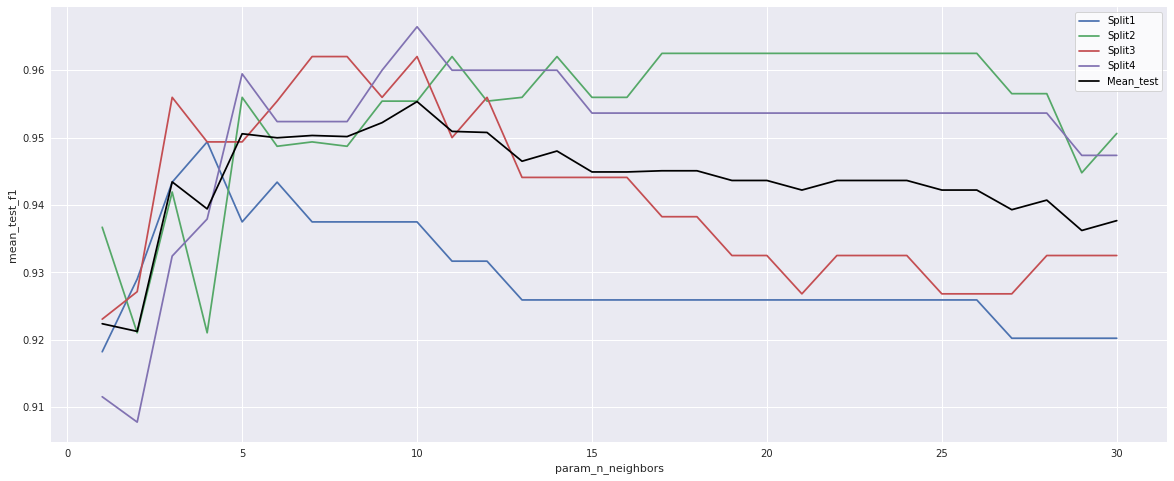

In [430]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,8))
    sns.lineplot(y='split0_test_f1',x='param_n_neighbors',data=gscv_results,legend='full',label='Split1')
    sns.lineplot(y='split1_test_f1',x='param_n_neighbors',data=gscv_results,legend='full',label='Split2')
    sns.lineplot(y='split2_test_f1',x='param_n_neighbors',data=gscv_results,legend='full',label='Split3')
    sns.lineplot(y='split3_test_f1',x='param_n_neighbors',data=gscv_results,legend='full',label='Split4')
    sns.lineplot(y='mean_test_f1',x='param_n_neighbors',data=gscv_results,legend='full',label='Mean_test',color='k')
plt.legend()
plt.show()

In [431]:
new_knn = KNeighborsClassifier(n_neighbors=7)

In [432]:
knn_model = new_knn.fit(X_train,y_train)

In [433]:
y_pred = knn_model.predict(X_test)

In [434]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [435]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [436]:
accuracy_score(y_test,y_pred)

0.9418604651162791

In [437]:
precision_score(y_test,y_pred)

0.9411764705882353

In [438]:
recall_score(y_test,y_pred)

0.96

In [439]:
from sklearn.model_selection import RandomizedSearchCV

In [440]:
rscv = RandomizedSearchCV(estimator=knn,param_distributions=param_dist,n_iter=10,scoring='f1',cv=skf,n_jobs=-1)

In [441]:
%%time
rscv.fit(X_train,y_train)

Wall time: 5.62 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'weights': ['uniform', 'distance']},
                   scoring='f1')

In [442]:
pd.DataFrame(rscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010005,0.000707,0.030504,0.003510,uniform,23,"{'weights': 'uniform', 'n_neighbors': 23}",0.925926,0.962500,0.932515,0.953642,0.943646,0.014944,6
1,0.010504,0.000859,0.031255,0.005991,uniform,4,"{'weights': 'uniform', 'n_neighbors': 4}",0.949367,0.921053,0.949367,0.937931,0.939429,0.011592,10
2,0.010993,0.002914,0.016490,0.004714,distance,11,"{'weights': 'distance', 'n_neighbors': 11}",0.937500,0.962025,0.955975,0.953642,0.952286,0.009068,1
3,0.012510,0.004933,0.027493,0.005725,uniform,14,"{'weights': 'uniform', 'n_neighbors': 14}",0.925926,0.962025,0.944099,0.960000,0.948013,0.014519,2
4,0.011128,0.002574,0.032369,0.007017,uniform,16,"{'weights': 'uniform', 'n_neighbors': 16}",0.925926,0.955975,0.944099,0.953642,0.944911,0.011829,5
5,0.013514,0.006662,0.016274,0.010850,distance,23,"{'weights': 'distance', 'n_neighbors': 23}",0.925926,0.962500,0.932515,0.960000,0.945235,0.016207,3
6,0.011754,0.003623,0.021737,0.015583,distance,25,"{'weights': 'distance', 'n_neighbors': 25}",0.925926,0.955975,0.932515,0.960000,0.943604,0.014640,7
7,0.011742,0.004204,0.019738,0.016304,distance,28,"{'weights': 'distance', 'n_neighbors': 28}",0.925926,0.955975,0.932515,0.953642,0.942015,0.013030,8
8,0.008744,0.000432,0.010993,0.000707,distance,30,"{'weights': 'distance', 'n_neighbors': 30}",0.925926,0.950000,0.938272,0.947368,0.940391,0.009417,9
9,0.009494,0.000500,0.012742,0.003111,distance,24,"{'weights': 'distance', 'n_neighbors': 24}",0.925926,0.962500,0.932515,0.960000,0.945235,0.016207,3
